## Import thư viện

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor

- Method:
    - Because of the target prediction have range from 0 to 10, we need to use Regression to predict the rating of a movie.<br>
    <img src = "https://madhureshkumar.files.wordpress.com/2015/07/cartoon_guide_regression.png" style = "max-width: 200rem;">

## Into the modelling method, We do divide the data into training set and test set with ratio of 8:2 using train_test_split function (This activity we not include in this notebook)
- Use all columns of dataframe as features and except the target column (IMDB_Rating) and the column with label "Unnamed: 0" and type String for training set
- Use the target column (IMDB_Rating) for test set <br>
<img src = "https://scikit-learn.org/stable/_images/grid_search_workflow.png" width = 640, height = 480 style="background-color:white;padding:20px;">

## Get train data and label prediction train on the condition if we don't get the test data

In [25]:
data_train = pd.read_csv('X_train.csv')
pred_train = pd.read_csv('y_train.csv')
data_train.drop(['Unnamed: 0'], axis=1, inplace=True)
pred_train.drop(['Unnamed: 0'], axis=1, inplace=True)

    Split data into train and test which is use to train the model and validation model

In [26]:
X_train, X_test, y_train, y_test =  train_test_split(data_train, pred_train, test_size=0.3, random_state=42)

## Rating Model Using Linear Regression
<img src = "https://i.postimg.cc/Prds5RR7/Formula-LR.png"><br>
*Linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).*

Calculate the RMSE of the Linear Regression Model on the Train and Validation Set

In [27]:
# LinerRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

# Predict
predict_train = LR.predict(X_train)
predict_test  = LR.predict(X_test)
RMSE_LR_TRAINING_BASIC = np.sqrt(mean_squared_error(y_train, predict_train))
RMSE_LR_VALID_BASIC = np.sqrt(mean_squared_error(y_test, predict_test))
print("RMSE OF LReg on Training Set: ", RMSE_LR_TRAINING_BASIC)
print("RMSE OF LReg on Validation Set: ", RMSE_LR_TRAINING_BASIC)


RMSE OF LReg on Training Set:  1.1288618519327878
RMSE OF LReg on Validation Set:  1.1288618519327878


## Rating Model Using KNN

### How to find the best K for KNN for this data?

*In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. SO THAT WHY NEED TO CHOOSE THE ODD NUMBER FOR KNN MODEL*

<img src = "http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png">
<img src = "http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png" width = "405" height = "346">

In [29]:
NUMBER_OF_NEIGHBORS = np.arange(1, 51, 2)
RMSE_OF_NEIGHBORS_WITH_TRAIN = []
RMSE_OF_NEIGHBORS_WITH_VALIDATION = []

#### Constructor of KNN class: <br>
##### *class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, \*, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)[source]*

*On that case: First of all we need to survey what is the best K for this data with default others hyperparameters of this model. Default distance_metric is minkowski with p = 2 so we can understand this distance_metric becomes ecluidean distance.*



In [30]:
for neighbor in NUMBER_OF_NEIGHBORS:
    model = KNeighborsRegressor(n_neighbors=neighbor)
    model.fit(X_train, y_train)
    # RMSE of training set
    y_train_pred = model.predict(X_train)
    RMSE_OF_NEIGHBORS_WITH_TRAIN.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    # RMSE of validation set
    y_valid_pred = model.predict(X_test)
    RMSE_OF_NEIGHBORS_WITH_VALIDATION.append(np.sqrt(mean_squared_error(y_test, y_valid_pred)))

We plot the RMSE of KNN model with different K value to see which point is make elbow curve.

Text(0.5, 1.0, 'RMSE of Validation Set')

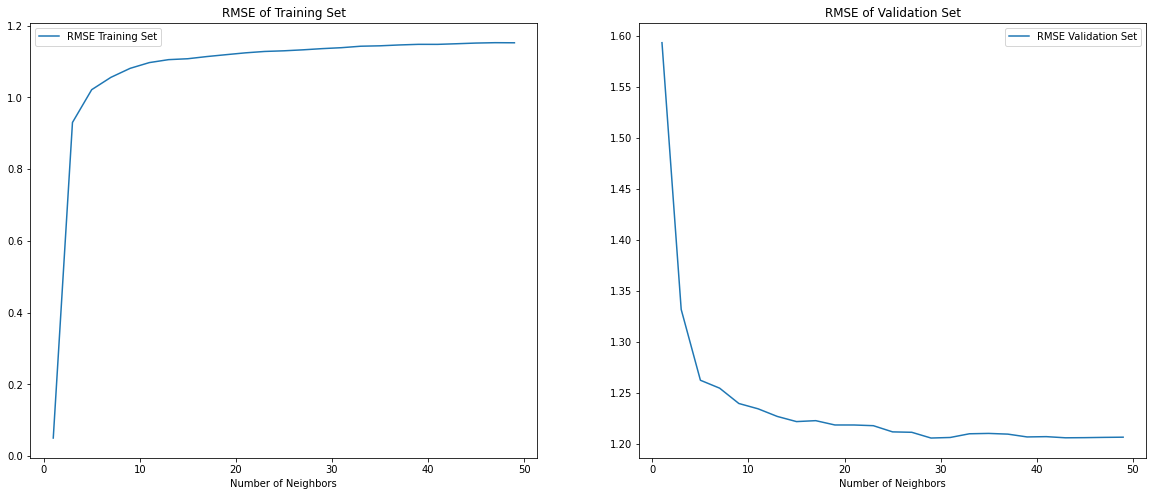

In [31]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.lineplot(x=NUMBER_OF_NEIGHBORS, y=RMSE_OF_NEIGHBORS_WITH_TRAIN, label='RMSE Training Set')
plt.xlabel('Number of Neighbors')
plt.title('RMSE of Training Set')
plt.subplot(1, 2, 2)
sns.lineplot(x=NUMBER_OF_NEIGHBORS, y=RMSE_OF_NEIGHBORS_WITH_VALIDATION, label='RMSE Validation Set')
plt.xlabel('Number of Neighbors')
plt.title('RMSE of Validation Set')

Look on the figure we can see, the RMSE in Validation Set is decrease with K value. At the value of K = 11, the RMSE is have . So we can clearly folded so can choose safety the K value 11 as the best K value. (Same as RMSE in Training Set but inversely)

In [32]:
RMSE_TRAINING_VALUE = RMSE_OF_NEIGHBORS_WITH_TRAIN[np.where(NUMBER_OF_NEIGHBORS == 11)[0][0]]
RMSE_VALIDATION_VALUE = RMSE_OF_NEIGHBORS_WITH_VALIDATION[np.where(NUMBER_OF_NEIGHBORS == 11)[0][0]]
print("The Value of RMSE Training set for KNN with K = 11: ", RMSE_TRAINING_VALUE)
print("The Value of RMSE Validation set for KNN with K = 11: ", RMSE_VALIDATION_VALUE)

The Value of RMSE Training set for KNN with K = 11:  1.096906342021206
The Value of RMSE Validation set for KNN with K = 11:  1.2346854082984255


The other method we can use to find the best K is to use gridsearchcv method instead of plot elbow curve which cumbersome and confusing for us <br>
<img src = "https://929687.smushcdn.com/2633864/wp-content/uploads/2021/03/hyperparameter_tuning_cv_grid_search-e1615719602429.png?lossy=1&strip=1&webp=1"> <br> <br> 
*GridSearchCV is a method to find the best hyperparameters for the model (Exhaustive search over specified parameter values for an estimator), It availabel for the flowing method so we can know we can using fit and predict of GridSearchCV with the model apply*
*GridSearchCV have much para so we need to focus on importance and useful parameters*
- Estimator: The model we want to use to find the best hyperparameters
- param_grid: The hyperparameters we want to use to find the best hyperparameters
- scoring: The metric we want to use to find the best hyperparameters (Recommend use RMSE with Regression)
- cv: The number of fold we want to use to find the best hyperparameters (Recommend use 5 fold)

In [33]:
params = {'n_neighbors': NUMBER_OF_NEIGHBORS, 'weights': ['uniform', 'distance']}
knn = KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5, scoring='neg_root_mean_squared_error')
model.fit(X_train, y_train)
best_param =  model.best_params_
print("The best parameters for KNN: ", best_param)
# Prediction on Training set
y_train_pred = model.predict(X_train)
print("RMSE of Training set by GridSearchCV: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
# Prediction on Validation set
y_valid_pred = model.predict(X_test)
print("RMSE of Validation set by GridSearchCV: ", np.sqrt(mean_squared_error(y_test, y_valid_pred)))


The best parameters for KNN:  {'n_neighbors': 49, 'weights': 'distance'}
RMSE of Training set by GridSearchCV:  0.03539784198678744
RMSE of Validation set by GridSearchCV:  1.1947881941439003


From the result of gridsearchcv method, we can get the best param value of KNN model with K = 11 and K = 49 for each method. **So we can use this param value to test with data**. Before doing this, we need to fit the model with the best param value, we try with 2 model basic and gridsearchcv method.

In [34]:
basic_model = KNeighborsRegressor(n_neighbors = 11)
basic_model.fit(X_train, y_train)
grid_model = KNeighborsRegressor(n_neighbors=best_param['n_neighbors'], weights=best_param['weights'])
grid_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=49, weights='distance')

## TESTING KNN MODEL WITH TEST DATA

Get the data test and predict the label of test data (We dont know anything of this just using the model and predict the label)

In [35]:
data_test = pd.read_csv('X_test.csv')
pred_test = pd.read_csv('y_test.csv')
data_test.drop(['Unnamed: 0'], axis=1, inplace=True)
pred_test.drop(['Unnamed: 0'], axis=1, inplace=True)

Let predict the label of test data with the best param value of KNN model and look RMSE

In [36]:
# Prediction on Test Set by Linear Regression model
y_test_pred_with_lr = LR.predict(data_test)
RMSE_TEST_VALUE_LR = np.sqrt(mean_squared_error(pred_test, y_test_pred_with_lr))
print("RMSE of Test set by Linear Regression: ", RMSE_TEST_VALUE_LR)
# Prediction on Test set by basic_model
y_test_pred_with_basic = basic_model.predict(data_test)
RMSE_TEST_VALUE_BASIC = np.sqrt(mean_squared_error(pred_test, y_test_pred_with_basic))
print("RMSE of Test set by basic_model: ", RMSE_TEST_VALUE_BASIC)
# Prediction on Test set by gridsearchcv model
y_test_pred_with_grid = grid_model.predict(data_test)
RMSE_TEST_VALUE_GRIDSEARCHCV = np.sqrt(mean_squared_error(pred_test, y_test_pred_with_grid))
print("RMSE of Test set by grid_model: ", RMSE_TEST_VALUE_GRIDSEARCHCV)

RMSE of Test set by Linear Regression:  1.0955993439298524
RMSE of Test set by basic_model:  1.1602892968865994
RMSE of Test set by grid_model:  1.1309887499758209


We draw this prediction result with the test data and look the result.

Text(0.5, 1.0, 'Linear Regression Prediction')

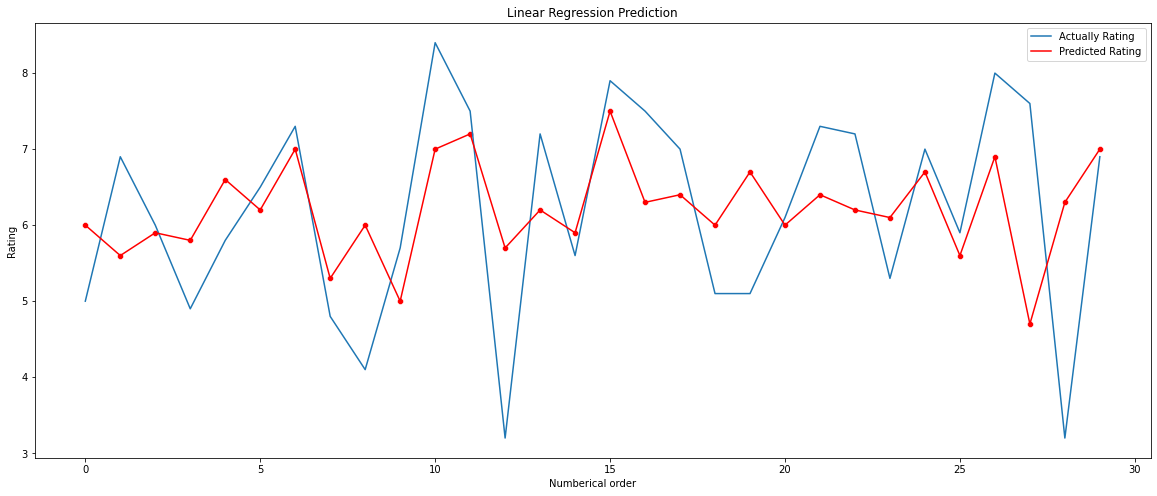

In [37]:
Result_Linear = pd.DataFrame()
Result_Linear["Actually Rating"] = pred_test
Result_Linear["Predicted Rating"] = np.round(y_test_pred_with_lr, 1)
Result_Linear["Diff bwt Actual and Predicted"] = np.absolute(Result_Linear["Actually Rating"] - Result_Linear["Predicted Rating"])
plt.figure(figsize=(20, 8))
sns.lineplot(x=np.arange(30), y=Result_Linear['Actually Rating'].head(30), label='Actually Rating')
sns.scatterplot(x=np.arange(30), y=Result_Linear['Predicted Rating'].head(30), color='red')
sns.lineplot(x=np.arange(30), y=Result_Linear['Predicted Rating'].head(30), label='Predicted Rating', color='red')
plt.xlabel('Numberical order')
plt.ylabel('Rating')
plt.title('Linear Regression Prediction')

Text(0.5, 1.0, 'Regression Plot for LR with Predicted Rating and Actual Rating')

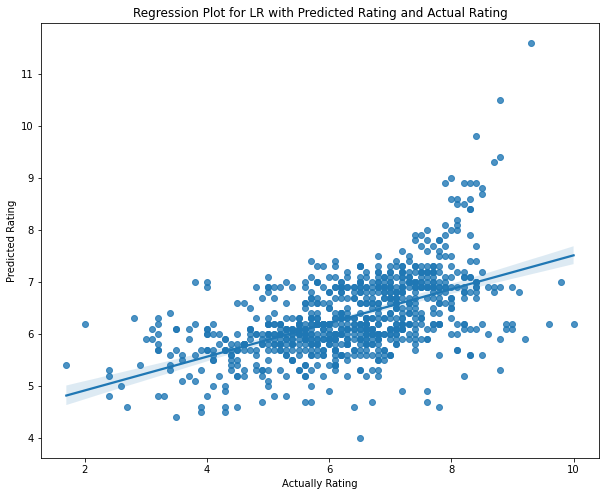

In [38]:
plt.figure(figsize=(10, 8))
sns.regplot(x = Result_Linear['Actually Rating'], y = Result_Linear['Predicted Rating'], scatter=True)
plt.title('Regression Plot for LR with Predicted Rating and Actual Rating')

In [39]:
Result_KNN = pd.DataFrame()
Result_KNN['Actually Rating'] = pred_test
Result_KNN['Predicted Rating With Basic'] = np.round(y_test_pred_with_basic, 1)
Result_KNN['Predicted Rating With Grid'] = np.round(y_test_pred_with_grid, 1)
Result_KNN['Diff bwt with Actual and Basic'] = np.absolute(Result_KNN['Actually Rating'] - Result_KNN['Predicted Rating With Basic'])
Result_KNN['Diff bwt with Actual and Grid'] = np.absolute(Result_KNN['Actually Rating'] - Result_KNN['Predicted Rating With Grid'])

Text(0.5, 1.0, 'KNN Prediction')

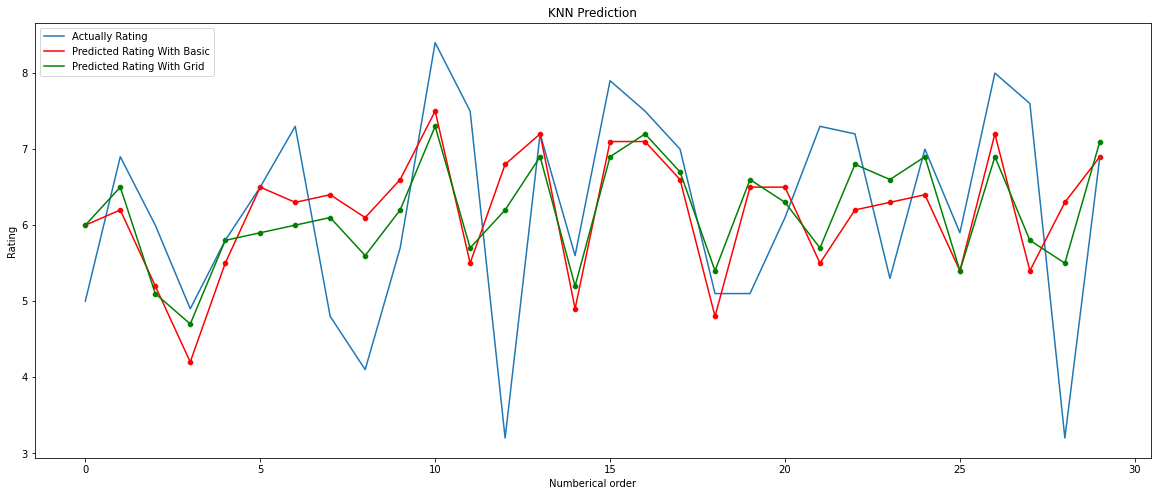

In [40]:
plt.figure(figsize=(20, 8))
sns.lineplot(x=np.arange(30), y=Result_KNN['Actually Rating'].head(30), label='Actually Rating')
sns.scatterplot(x=np.arange(30), y=Result_KNN['Predicted Rating With Basic'].head(30), color='red')
sns.lineplot(x=np.arange(30), y=Result_KNN['Predicted Rating With Basic'].head(30), label='Predicted Rating With Basic', color='red')
sns.scatterplot(x=np.arange(30), y=Result_KNN['Predicted Rating With Grid'].head(30), color='green')
sns.lineplot(x=np.arange(30), y=Result_KNN['Predicted Rating With Grid'].head(30), label='Predicted Rating With Grid', color='green')
plt.xlabel('Numberical order')
plt.ylabel('Rating')
plt.title('KNN Prediction')

Text(0.5, 1.0, 'Regression Plot for KNN GridSearchCV with predicted ratings and actual ratings')

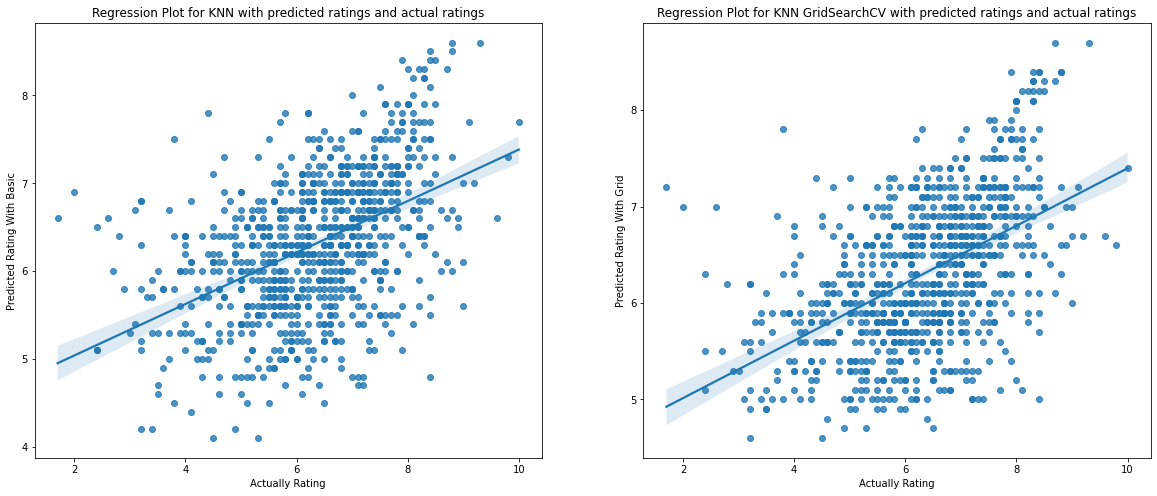

In [41]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.regplot(x = Result_KNN['Actually Rating'], y = Result_KNN['Predicted Rating With Basic'], scatter=True)
plt.title('Regression Plot for KNN with predicted ratings and actual ratings')
plt.subplot(1, 2, 2)
sns.regplot(x = Result_KNN['Actually Rating'], y = Result_KNN['Predicted Rating With Grid'], scatter=True)
plt.title('Regression Plot for KNN GridSearchCV with predicted ratings and actual ratings')

#### How we can improve performance with this data ? bagging technique can solve this problem

<img src = "https://hudsonthames.org/wp-content/uploads/2019/09/bagging-1.png"> <br>

*Bootstrap Aggregation, or Bagging for short, is an ensemble machine learning algorithm. Can know easily, Sampling data with the model we have and take this for train again model and using this for predict target label for test set*
*Bagging Method, we need to focus 2 para in API of model*
- base_estimator: The model we want to use (if we not use this, Bagging will apply DecisionTreeRegressor model for default)
- n_estimators: The number of base estimators in the ensemble(Recommend use 100-200))
- other para: 
    -   max_sample: The number of samples to draw from X to train each base estimator (with replacement by default, see bootstrap for more details).
    -   max_features: The number of features to draw from X to train each base estimator ( without replacement by default, see bootstrap_features for more details).


In [42]:
def BaggingModel(model_estimator, n_estimators = 100):
    bagging_model = BaggingRegressor(model_estimator, n_estimators)
    bagging_model.fit(X_train, y_train)
    y_bagging_pred = bagging_model.predict(data_test)
    rmse_pred =  np.sqrt(mean_squared_error(pred_test, y_bagging_pred))
    return rmse_pred, y_bagging_pred
    

In [43]:
RMSE_TEST_VALUE_BAGGING_KNN, Bagging_Pred_KNN = BaggingModel(grid_model) 
print("RMSE of Test set by KNN GridSearchCV and bagging_model: ", RMSE_TEST_VALUE_BAGGING_KNN)
Result_KNN['Predicted Rating With Bagging'] = np.round(Bagging_Pred_KNN, 1)
Result_KNN['Diff bwt with Actual and Bagging'] = np.absolute(Result_KNN['Actually Rating'] - Result_KNN['Predicted Rating With Bagging'])

RMSE of Test set by KNN GridSearchCV and bagging_model:  1.1305195659635674


In [44]:
RMSE_TEST_VALUE_BAGGING_LR, Bagging_Pred_LR = BaggingModel(LR)
print("RMSE of Test set by Linear Regression and bagging_model: ", RMSE_TEST_VALUE_BAGGING_LR)
Result_Linear['Predicted Rating With Bagging'] = np.round(Bagging_Pred_LR, 1)
Result_Linear['Diff bwt with Actual and Bagging'] = np.absolute(Result_Linear['Actually Rating'] - Result_Linear['Predicted Rating With Bagging'])

RMSE of Test set by Linear Regression and bagging_model:  1.0945010029438174


## Conclusion and Compare between KNN Regression and Linear Regression

In [45]:
def calculateMAEPredict(df):
    mean_df = np.mean(df)
    sum_err_df = np.sum(np.absolute(df - mean_df))
    return np.round((sum_err_df / len(df)),4)

Calculate RMSE and MAE for KNN Regression and Linear Regression

In [46]:
Conclusion = pd.DataFrame()
Conclusion["Type of Model"] = ["Linear Regression", "LR with Bagging", "KNN", "KNN with GridSearchCV", "KNN with GridSearchCV and Bagging"]
# Calculate MAE and RMSE for each model to Rating this model
Conclusion["RMSE"] = [np.round(RMSE_TEST_VALUE_LR, 4), np.round(RMSE_TEST_VALUE_BAGGING_LR, 4), np.round(RMSE_TEST_VALUE_BASIC, 4), 
                      np.round(RMSE_TEST_VALUE_GRIDSEARCHCV, 4), np.round(RMSE_TEST_VALUE_BAGGING_KNN, 4)]
Conclusion["MAE"] = [np.round(mean_absolute_error(pred_test, y_test_pred_with_lr),4),  np.round(calculateMAEPredict(Bagging_Pred_LR),4),
                     np.round(mean_absolute_error(pred_test, y_test_pred_with_basic),4), np.round(mean_absolute_error(pred_test, y_test_pred_with_grid),4), 
                     np.round(mean_absolute_error(pred_test, Bagging_Pred_KNN),4)]
# Show MEAN ERROR of each model
Conclusion["Mean Err"] = [np.round(np.mean(Result_Linear['Diff bwt Actual and Predicted']),4), np.round(np.mean(Result_Linear['Diff bwt with Actual and Bagging']),4),
                          np.round(np.mean(Result_KNN['Diff bwt with Actual and Basic']),4), np.round(np.mean(Result_KNN['Diff bwt with Actual and Grid']),4), 
                          np.round(np.mean(Result_KNN['Diff bwt with Actual and Bagging']), 4)]
# Show STD ERROR of each model
Conclusion["Std Err"] = [np.round(np.std(Result_Linear['Diff bwt Actual and Predicted']),4 ), np.round(np.std(Result_Linear['Diff bwt with Actual and Bagging']),4),
                         np.round(np.std(Result_KNN['Diff bwt with Actual and Basic']), 4), np.round(np.std(Result_KNN['Diff bwt with Actual and Grid']), 4), 
                         np.round(np.std(Result_KNN['Diff bwt with Actual and Bagging']),4)]
# This value to show the mean of Prediction Rating and MAE of Prediction on Range (Not compare with Actual Rating)
Conclusion["Result Rating"] = [str(np.round(np.mean(Result_Linear['Predicted Rating']),4)) + "± " + str(calculateMAEPredict(Result_Linear['Predicted Rating'])),
                               str(np.round(np.mean(Result_Linear['Predicted Rating With Bagging']),4)) + "± " + str(calculateMAEPredict(Result_Linear['Predicted Rating With Bagging'])),
                               str(np.round(np.mean(Result_KNN['Predicted Rating With Basic']),4)) + "± " + str(calculateMAEPredict(Result_KNN['Predicted Rating With Basic'])),
                               str(np.round(np.mean(Result_KNN['Predicted Rating With Grid']), 4)) + "± " + str(calculateMAEPredict(Result_KNN['Predicted Rating With Grid'])), 
                               str(np.round(np.mean(Result_KNN['Predicted Rating With Bagging']),4 )) + "± " + str(calculateMAEPredict(Result_KNN['Predicted Rating With Bagging']))]
Conclusion
       

,Type of Model,RMSE,MAE,Mean Err,Std Err,Result Rating
0,Linear Regression,1.0956,0.8354,0.8360,0.7103,6.3212± 0.5889
1,LR with Bagging,1.0945,0.5935,0.8343,0.7103,6.3312± 0.5929
2,KNN,1.1603,0.8837,0.8846,0.7528,6.3088± 0.6413
3,KNN with GridSearchCV,1.1310,0.8563,0.8570,0.7385,6.3047± 0.6316
4,KNN with GridSearchCV and Bagging,1.1305,0.8613,0.8622,0.7328,6.2998± 0.6242


Conclusion:
- We can see that Linear Regression is better than KNN Regression because the data is so complex and the dimension of data is so high. so far it make the KNN Regression model is not good enough.
- KNN is flexible and We can improve the performance of KNN Regression model by using bagging technique. so far we can apply other weighting technique to improve the performance of KNN Regression model such as Gaussian Weighting. otherwise we can change the distance for optimize for dimension of data.
- Linear Regression is passive model and we can not improve the performance of Linear Regression model by changing the hyperparameters. If you trying Bagging method for linear regression we can improve a little bit the performance of Linear Regression.
- So far bagging technique is one of the method can improve the performance of Regression model but not much for model not flexible. (KNN is flexibler than Linear Regression)
- If we want to get the better performance for data, We need to use the nerual network model or probabilistic model because it cover all data by learning and it will be better than supervised learning such as Linear and KNN